In [6]:
from boxdetect import config
from boxdetect.pipelines import get_boxes, get_checkboxes
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import numpy as np


In [2]:

def get_contours(img_bin):
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours



def is_correct_area(contour, expected_area=300000, tolerance=280000):
    area = cv2.contourArea(contour)
    return abs(area - expected_area) <= tolerance

In [77]:
file_path = ('harel.png')

cfg = config.PipelinesConfig()
width=800
height=800
rangus=780

cfg.width_range = (width-rangus,width+rangus)
cfg.height_range = (height-rangus,height+rangus)
cfg.scaling_factors = [0.9]

cfg.wh_ratio_range = (0.5, 20.1)

cfg.group_size_range = (1, 1)

cfg.dilation_iterations = 0

# cfg.autoconfigure([(12, 34)])

cfg.autoconfigure_from_vott(
    vott_dir="~/Documents/vott", class_tags=["1"])


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
from boxdetect.pipelines import get_boxes

rects, grouping_rects, image, output_image = get_boxes(
    file_path, cfg=cfg, plot=False)

Processing file:  harel.png


In [70]:
len(rects)

403

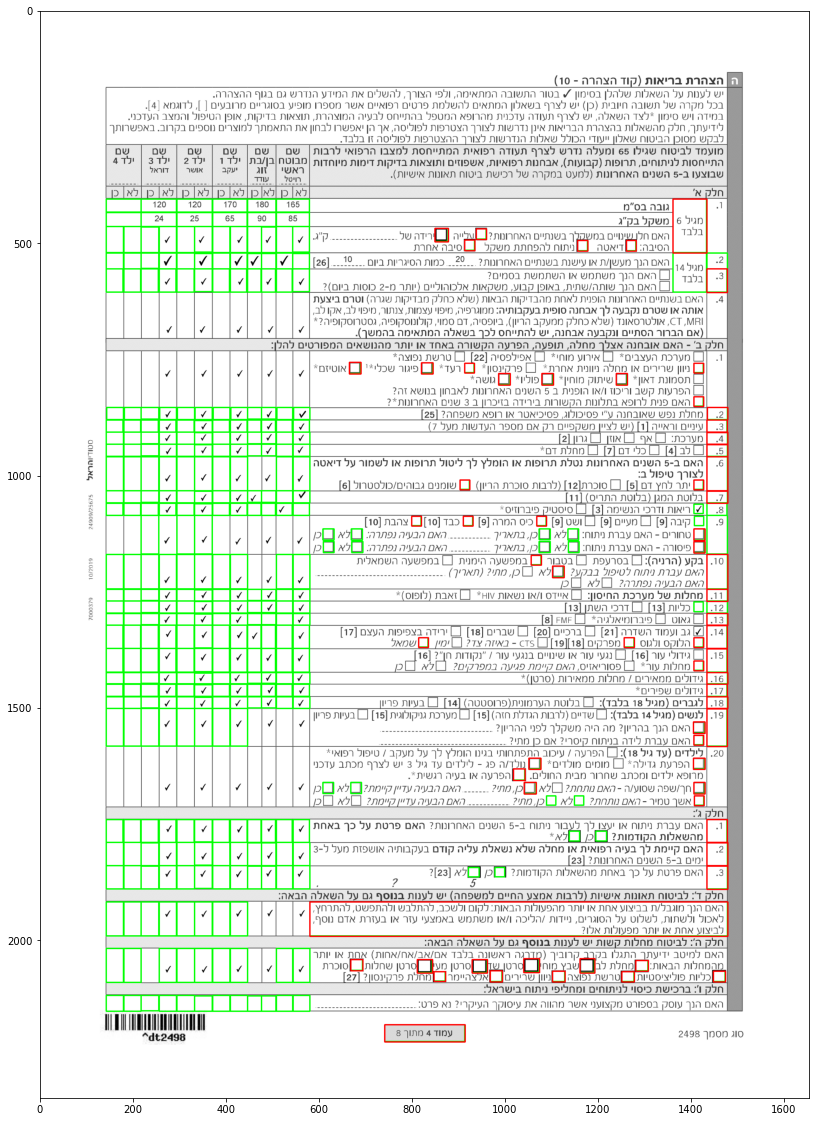

In [71]:
grouping_rects
plt.figure(figsize=(20,20))
plt.imshow(output_image)
plt.show()

In [10]:
cfg.height_range

(80, 160)

In [7]:
img= cv2.imread(file_path)
np.array(img).shape


(2339, 1654, 3)

In [5]:
checkboxes = get_checkboxes(
    file_path, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

Processing file:  harel.png
----------------------------------
nonzero_px_count:  18
all_px_count:  1876
nonzero_px_count / all_px_count =  0.009594882729211088
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  2352
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  168
all_px_count:  627
nonzero_px_count / all_px_count =  0.2679425837320574
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  2520
nonzero_px_count / all_px_count =  0.0
----------------------------------


Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (1439, 612, 40, 95)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


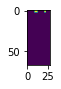

Checkbox bounding rectangle (x,y,width,height):  (1439, 738, 40, 118)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


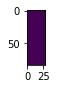

Checkbox bounding rectangle (x,y,width,height):  (105, 1043, 15, 81)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


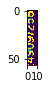

Checkbox bounding rectangle (x,y,width,height):  (1439, 1588, 40, 126)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


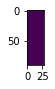

In [6]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

In [7]:
im = cv2.imread('harel.png')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
idx =0 


In [ ]:
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=im[y:y+h,x:x+w]
    cv2.imshow('img',roi)
    cv2.waitKey(33) 
    #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
   

In [ ]:
cv2.destroyAllWindows()


In [ ]:
contours